#Regression Tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

--2021-05-23 20:51:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K  --.-KB/s    in 0.07s   

2021-05-23 20:51:18 (449 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [3]:
names = 'mpg cyl disp hp weight acc model origin name'
names = names.split(' ')

In [4]:
df = pd.read_table('auto-mpg.data', delimiter=r"\s+", index_col=False,names=names,na_values=['?'])


In [5]:
df

,mpg,cyl,disp,hp,weight,acc,model,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [6]:
df.tail()

,mpg,cyl,disp,hp,weight,acc,model,origin,name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [7]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'weight', 'acc', 'model', 'origin', 'name'], dtype='object')

In [8]:
df.describe()

,mpg,cyl,disp,hp,weight,acc,model,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
df.isna().sum()

mpg       0
cyl       0
disp      0
hp        6
weight    0
acc       0
model     0
origin    0
name      0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df=df.drop(['weight', 'acc', 'model', 'origin'], axis = 1)


In [12]:
df

,mpg,cyl,disp,hp,name
0,18.0,8,307.0,130.0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,buick skylark 320
2,18.0,8,318.0,150.0,plymouth satellite
3,16.0,8,304.0,150.0,amc rebel sst
4,17.0,8,302.0,140.0,ford torino
...,...,...,...,...,...
393,27.0,4,140.0,86.0,ford mustang gl
394,44.0,4,97.0,52.0,vw pickup
395,32.0,4,135.0,84.0,dodge rampage
396,28.0,4,120.0,79.0,ford ranger


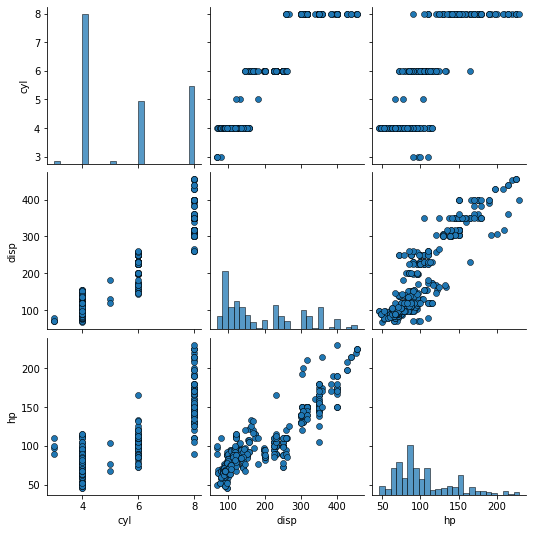

In [13]:
sns.pairplot(data=df[df.columns[1:]],diag_kws={'edgecolor':'k','bins':25},plot_kws={'edgecolor':'k'})
plt.show()

In [14]:
X = df.drop(['mpg' ,'name'],axis=1)
X

,cyl,disp,hp
0,8,307.0,130.0
1,8,350.0,165.0
2,8,318.0,150.0
3,8,304.0,150.0
4,8,302.0,140.0
...,...,...,...
393,4,140.0,86.0
394,4,97.0,52.0
395,4,135.0,84.0
396,4,120.0,79.0


In [15]:
Y = df['mpg']
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.30, random_state=32)

In [17]:
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (274, 3)
Test set shape (118, 3)


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regr = LinearRegression()

In [20]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
regr.intercept_

39.296469138752336

In [22]:
regr.coef_

array([-0.75170702, -0.0331635 , -0.05020349])

In [23]:
regr.score(X_test, y_test)

0.6188181859268536

In [24]:
X_test.iloc[1]

cyl      4.0
disp    90.0
hp      70.0
Name: 197, dtype: float64

In [26]:
regr.predict([[8, 307, 130]])

array([16.57516334])

In [27]:
y_test.iloc[1]

29.0

In [28]:
# Make predictions using the testing 
y_pred = regr.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-0.75170702 -0.0331635  -0.05020349]
Mean squared error: 21.58
Coefficient of determination: 0.62


In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X, Y, cv=10)
scores

array([ 0.30850837,  0.51534648,  0.22262773,  0.62242928,  0.52203618,
        0.70250111,  0.57531877,  0.59420649, -0.73515911, -0.17242847])

In [31]:
 print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.32 (+/- 0.85)
